## Import neccessary libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading The Dataset

In [2]:
spam_df = pd.read_csv('mail_data.csv')
spam_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
spam_df.shape

(5572, 2)

In [4]:
spam_df.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
spam_df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [12]:
print("Percentage of ham values: " ,(spam_df.Category.value_counts().iloc[0]/spam_df.shape[0])*100)

Percentage of ham values:  86.59368269921033


In [13]:
print("Percentage of Spam values: ", (spam_df.Category.value_counts().iloc[1]/spam_df.shape[0])*100)

Percentage of Spam values:  13.406317300789663


In [18]:
spam_df = spam_df.where(pd.notnull(spam_df), '')
spam_df11 = spam_df.mask(pd.notnull(spam_df), '')


In [20]:
del spam_df11

In [21]:
spam_df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Label Encoding

In [24]:
spam_df.loc[spam_df['Category'] == 'spam', 'Category'] = 0
spam_df.loc[spam_df['Category'] == 'ham', 'Category'] = 1

In [25]:
spam_df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


### Spliting the data into Features and Labels

In [28]:
X = spam_df['Message']
y = spam_df['Category'].astype(int)

X , y

(0       Go until jurong point, crazy.. Available only ...
 1                           Ok lar... Joking wif u oni...
 2       Free entry in 2 a wkly comp to win FA Cup fina...
 3       U dun say so early hor... U c already then say...
 4       Nah I don't think he goes to usf, he lives aro...
                               ...                        
 5567    This is the 2nd time we have tried 2 contact u...
 5568                 Will ü b going to esplanade fr home?
 5569    Pity, * was in mood for that. So...any other s...
 5570    The guy did some bitching but I acted like i'd...
 5571                           Rofl. Its true to its name
 Name: Message, Length: 5572, dtype: object,
 0       1
 1       1
 2       0
 3       1
 4       1
        ..
 5567    0
 5568    1
 5569    1
 5570    1
 5571    1
 Name: Category, Length: 5572, dtype: int32)

In [30]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4457,), (1115,), (4457,), (1115,))

In [48]:
tfidf = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_transformed = tfidf.fit_transform(X_train)
X_test_transformed = tfidf.transform(X_test)
X_train_transformed.shape, X_test_transformed.shape

((4457, 7474), (1115, 7474))

In [49]:
sm = SMOTE()
X_train_tf_sm,  y_train_sm = sm.fit_resample(X_train_transformed, y_train)

In [50]:
X_train_tf_sm.shape, y_train_sm.shape

((7718, 7474), (7718,))

In [51]:
y_train_sm.value_counts()

Category
1    3859
0    3859
Name: count, dtype: int64

## Model decleration and Fitting of Model

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

model = LogisticRegression()
model.fit(X_train_tf_sm, y_train_sm)

LogisticRegression()

## Prediction

In [53]:
y_ = model.predict(X_test_transformed)

print(accuracy_score(y_test, y_))
print(classification_report(y_test, y_))

0.97847533632287
              precision    recall  f1-score   support

           0       0.96      0.87      0.92       149
           1       0.98      0.99      0.99       966

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [54]:
confusion_matrix(y_test, y_)

array([[130,  19],
       [  5, 961]], dtype=int64)

## Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

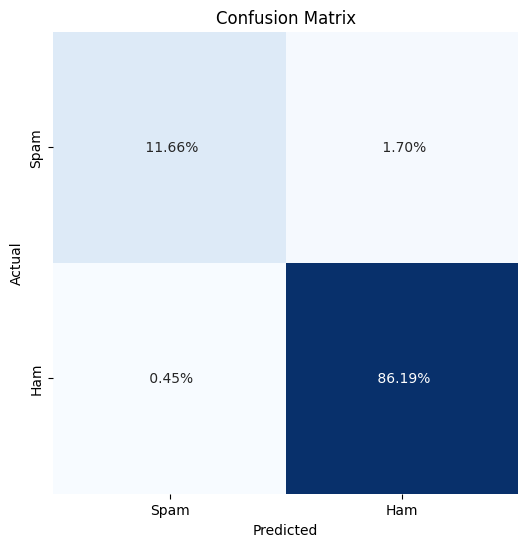

In [67]:
plt.figure(figsize=(6,6))
sns.heatmap((confusion_matrix(y_test, y_)/np.sum(confusion_matrix(y_test, y_))), cmap="Blues", cbar=False, annot=True, fmt=' .2%', yticklabels=['Spam', 'Ham'], xticklabels =['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

## Learning Curve

In [105]:
from sklearn.model_selection import StratifiedKFold
str_kfold = StratifiedKFold(n_splits=5)
train_sizes, train_scores, test_scores = learning_curve(model, X_train_transformed, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')
# train_sizes, train_scores, test_scores

In [104]:
# train_sizes_t, train_scores_t, test_scores_t = learning_curve(model, X_train_tf_sm, y_train_sm, train_sizes=np.linspace(0.1, 1.0, 10), cv=str_kfold, scoring='accuracy')
# train_sizes_t, train_scores_t, test_scores_t

In [118]:
train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
test_score_mean = np.mean(test_scores, axis=1)
test_score_std = np.std(test_scores, axis=1)

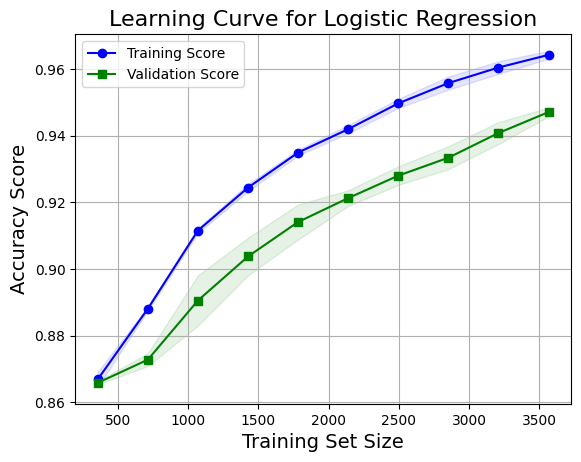

In [119]:
plt.plot(train_sizes, train_score_mean, label='Training Score', color='blue', marker='o')
plt.plot(train_sizes, test_score_mean, label='Validation Score', color='green', marker='s')
plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, 
                 color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, 
                 color='green', alpha=0.1)

# Labels and title
plt.title('Learning Curve for Logistic Regression', fontsize=16)
plt.xlabel('Training Set Size', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [121]:
import pickle 
with open('model.dat', 'wb') as file:
    pickle.dump(model, file)